<a href="https://colab.research.google.com/github/mahdiheidari721/DeepLearning/blob/HW1/DL_HW1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [ ]:
first_name= "Mahdi"
last_name= "Heidari"
student_number= "99100369"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [ ]:
import numpy as np
import pandas as pd
import keras.datasets
import matplotlib.pyplot as plt

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


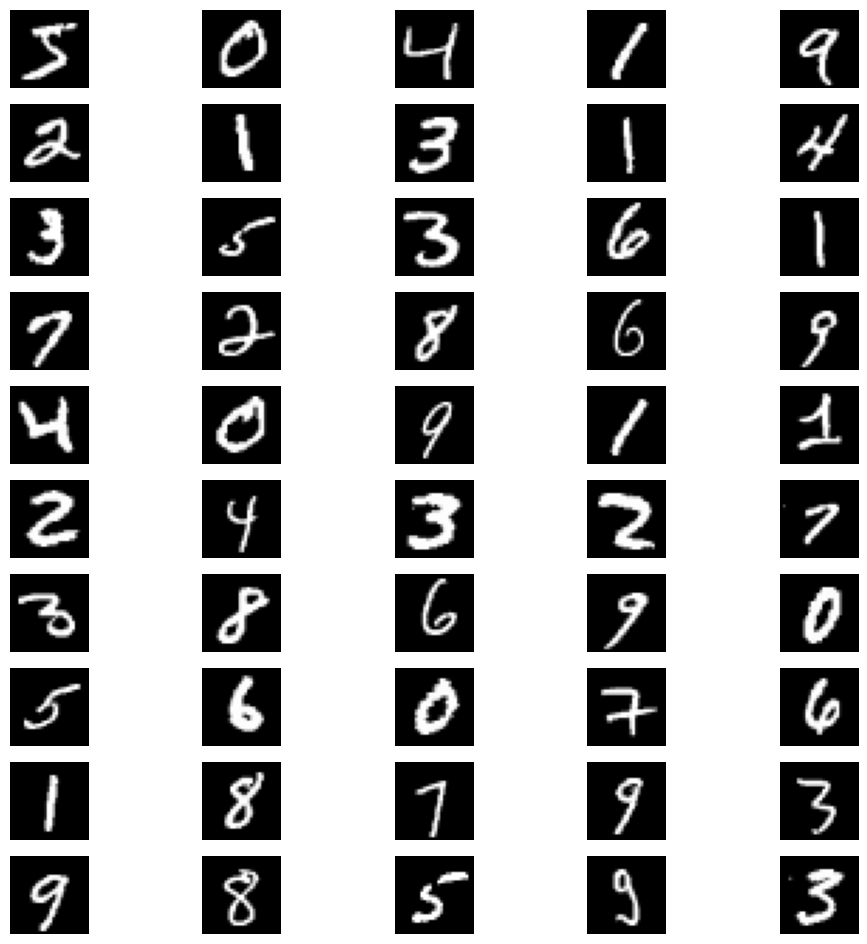

In [ ]:
def show_images(num_images,X):
    rows = num_images // 5
    fig, axes = plt.subplots(rows, 5, figsize=(12, 12))
    for i in range(num_images):
        ax = axes[i // 5, i % 5]
        ax.imshow(X[i], cmap='gray')
        ax.axis('off')

    plt.show()
show_images(50, x_train)

In [ ]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train=x_train/255


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [ ]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

A=[]
for i in range(len(x_train)):
      rows,cols = x_train[i].shape # gives dimensions for RGB array
      img_size = rows*cols
      img_1D_vector = x_train[i].reshape(img_size)
      A.append(img_1D_vector)
X=np.array(A)
A=[]
for i in range(len(x_test)):
      rows,cols = x_train[i].shape # gives dimensions for RGB array
      img_size = rows*cols
      img_1D_vector = x_train[i].reshape(img_size)
      A.append(img_1D_vector)
X_T=np.array(A)
X_meaned = (X - np.mean(X ))/np.std(X)
cov_mat = np.matmul(X_meaned.transpose(), X_meaned)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print(cov_mat.shape)
print(eigen_values)
print(eigen_vectors)


(784, 784)
[-1.19225842e-09 -8.42890958e-10 -6.56749890e-10 -5.92822929e-10
 -5.38340227e-10 -4.47882434e-10 -3.79900610e-10 -3.53846141e-10
 -3.50517114e-10 -2.31573989e-10 -2.15415368e-10 -1.66969707e-10
 -1.61264476e-10 -1.20359170e-10 -7.64451339e-11 -6.30151921e-11
 -4.18868424e-11 -4.16782963e-11 -3.83056427e-11 -3.15905639e-11
 -3.03147569e-11 -2.83913215e-11 -2.18746488e-11 -2.08649117e-11
 -1.81886527e-11 -1.32919182e-11 -1.31256603e-11 -8.86052495e-12
 -7.90950049e-12 -6.17553926e-12 -6.03588519e-12 -5.63464884e-12
 -4.83132391e-12 -3.35858601e-12 -3.09606005e-12 -1.88982739e-12
 -1.11771179e-13  2.82672197e-13  9.79330593e-13  1.28908109e-12
  2.08712090e-12  2.57586384e-12  2.84837439e-12  4.17685008e-12
  5.08684983e-12  5.44420546e-12  7.31502326e-12  1.08104892e-11
  1.08218077e-11  1.25183031e-11  2.01898463e-11  2.01999702e-11
  2.55934970e-11  2.83287482e-11  3.44528085e-11  4.51306199e-11
  4.75921732e-11  5.36498578e-11  6.46854706e-11  7.90777702e-11
  1.08430351e-

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

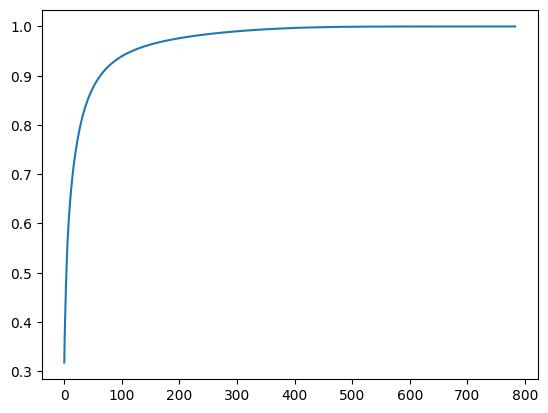

In [ ]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvalue = sorted_eigenvalue/sum(sorted_eigenvalue)

sorted_eigenvectors = eigen_vectors[:,sorted_index]
plt.plot(range(784),np.cumsum(sorted_eigenvalue))
#calculate the compression_ratio

حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

Text(0.5, 1.0, 'Original')

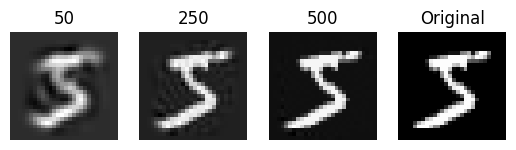

In [ ]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image
from numpy import linalg as LA
p=[50,250,500]
for i  in range(3):
  eigenvector_subset = sorted_eigenvectors[:,0:p[i]]
  x_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()
  temp= np.matmul(eigenvector_subset,x_reduced[0])
  temp.shape
  temp=temp.real
  plt.subplot(1,4,i+1)
  plt.imshow(temp.reshape(28,28) , cmap= 'gray')
  plt.axis('off')
  plt.title(str(p[i]))
#TODO
#plot the dimentionally reduced data
#plot the original data
plt.subplot(1,4,4)
plt.imshow(x_train[0] , cmap= 'gray')
plt.axis('off')
plt.title('Original')

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [ ]:
#complete below function using python PCA function
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
def do_pca(data, n_components):
  #input number of component and not normalized data set.
  #output is the projected dataset
    data = data.reshape(data.shape[0], -1)
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    return data_pca

In [ ]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
def ML_model(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
n_components = 10
X_train_pca = do_pca(X_train, n_components)
accuracy = ML_model(X_train_pca, y_train)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.13%


In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
(X_train, y_train), (X_test, y_test) = mnist.load_data()
acc_list, pc_list = [], []
for pc in range(2,101):
  print(pc)
  pc_list.append(pc)
  X_train_pca = do_pca(X_train, n_components)
  acc_list.append(ML_model(X_train_pca, y_train))

    #TODO

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


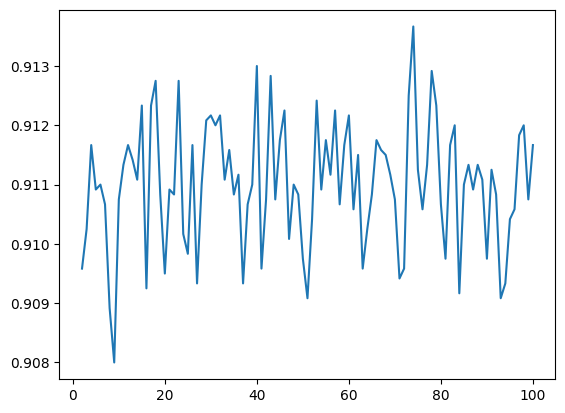

In [ ]:
#plot the accuracy based on components.
#TODO
plt.plot(pc_list,acc_list)

In [ ]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
print(pc_list[np.argmax(acc_list)])
print(max(acc_list))

74
0.9136666666666666
